In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
print(df.head(5))

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.shape

(400, 3)

In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
X = df.drop('Purchased', axis = 1)
y = df['Purchased']

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# for col in df.select_dtypes(include=['int64']).columns:
#     x_trained[col] = ss.fit_transform(x[[col]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_trained_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(X_trained_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)


In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy of SVM: ", accuracy_score(y_test,y_pred_svm))

Accuracy of SVM:  0.925


In [17]:
print("Accuracy of DT: ", accuracy_score(y_test,y_pred_dtc))

Accuracy of DT:  0.8375


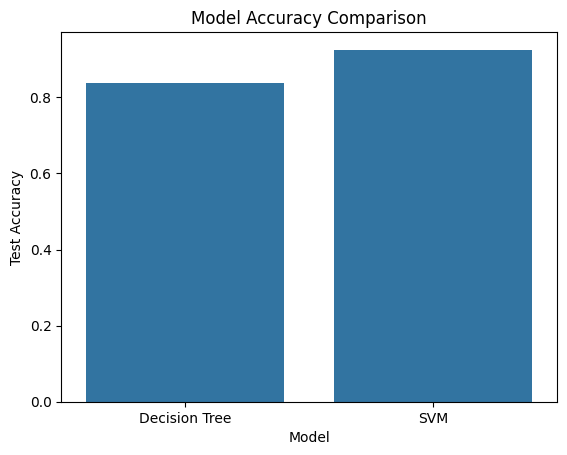

In [19]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM'],
    'Test Accuracy': [accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_svm)],
})

sns.barplot(x='Model', y='Test Accuracy', data=results)
plt.title("Model Accuracy Comparison")
plt.show()
